## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [4]:
#写入代码

data_train = pd.read_csv('./train.csv')
data_train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
#写入代码

data_clear = pd.read_csv('./clear_data.csv')
data_clear.head()


PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0            0       3  22.0      1      0   7.2500           0         1   
1            1       1  38.0      1      0  71.2833           1         0   
2            2       3  26.0      0      0   7.9250           1         0   
3            3       1  35.0      1      0  53.1000           1         0   
4            4       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [6]:
#写入代码

from sklearn.model_selection import train_test_split 


In [7]:
#写入代码

x_train, x_test, y_train, y_test = train_test_split(data_clear, data_train.Survived, test_size=0.2, random_state=40)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(712, 11) (712,) (179, 11) (179,)


### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结

In [8]:
#思考回答：

# 意思是通过多次划分数据进行训练模型，对各个模型的结果进行交叉验证，从而得出最优的模型。

#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

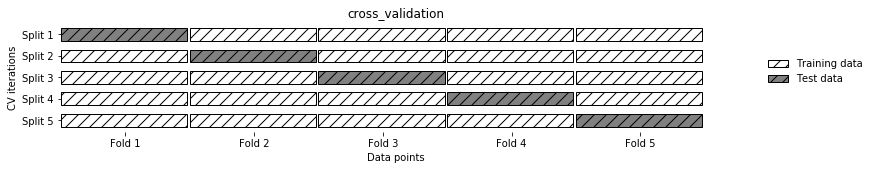

In [9]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [10]:
#写入代码

from sklearn.model_selection import cross_val_score

In [11]:
#写入代码

clf = LogisticRegression(C=100)
scores = cross_val_score(clf, x_train, y_train, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [12]:
#写入代码

scores

array([0.81944444, 0.73611111, 0.76056338, 0.78873239, 0.84507042,
       0.81690141, 0.74647887, 0.78873239, 0.81690141, 0.78873239])

In [13]:
#写入代码

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.79


#### 思考4
* k折越多的情况下会带来什么样的影响？

In [14]:
#思考回答

# 对于k折交叉验证，k越大越好, 选择大的k会提高分类准确率

#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

### 思考回答

混淆矩阵是数据科学、数据分析和机器学习中总结分类模型预测结果的情形分析表，以矩阵形式将数据集中的记录按照真实的类别与分类模型作出的分类判断两个标准进行汇总。

以二元分类问题为例，数据集存在肯定类别和否定类别两类记录，而分类模型对记录分类可能作出阳性判断（判断记录属于肯定类别）或阴性判断（判断记录属于否定类别）两种判断。混淆矩阵是一个2 × 2的情形分析表，显示以下四组记录的数目：作出正确判断的肯定记录（真阳性）、作出错误判断的肯定记录（假阴性）、作出正确判断的否定记录（真阴性）以及作出错误判断的否定记录（假阳性）。

混淆矩阵是对分类模型进行性能评价的重要工具。由混淆矩阵可以计算真阳性率、假阳性率、真阴性率、假阴性率、准确率、精确率和F指标等各种评价指标。特别是混淆矩阵区分了假阳性和假阴性两种不同性质的误判，可以用来估计分类模型误判造成的期望损失。当分类模型返回各记录属于肯定类别的概率或评分时，指定阈值，对所有概率或评分在阈值以上的记录作阳性判断，可以得到一个混淆矩阵。通过连续改变阈值，可以得到不同的混淆矩阵，从而绘制ROC曲线、期望利润曲线和提升系数曲线，更全面地评价和比较分类模型的性能。


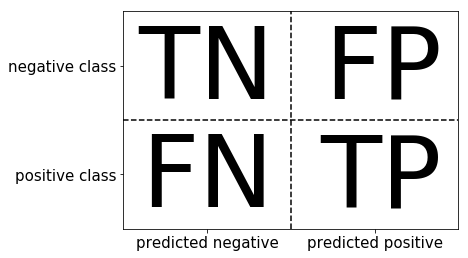

In [15]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

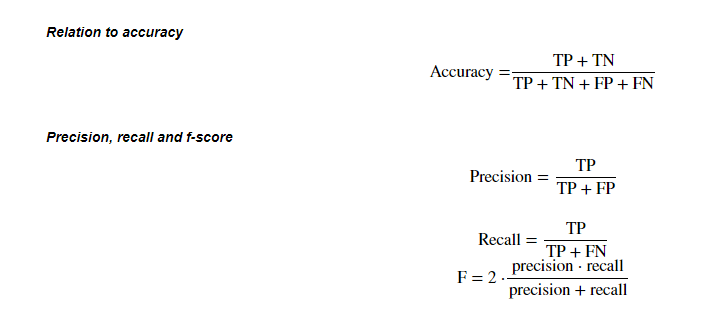

In [16]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [17]:
#写入代码

from sklearn.metrics import confusion_matrix

In [18]:
#写入代码

clf = LogisticRegression(C=100)
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#写入代码

y_predict = clf.predict(x_train)

In [20]:
#写入代码

confusion_matrix(y_train, y_predict)

array([[384,  62],
       [ 89, 177]], dtype=int64)

【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

In [21]:
#思考回答

#  要分清楚什么是真正,真负,假正,假负
# 真正（True Positive , TP）被模型预测为正的正样本；
# 假负（False Negative , FN）被模型预测为负的正样本；
# 假正（False Positive , FP）被模型预测为正的负样本；
# 真负（True Negative , TN）被模型预测为负的负样本。


#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是OCR曲线，OCR曲线的存在是为了解决什么问题？

In [22]:
#思考

# ROC的全名叫做Receiver Operating Characteristic，中文名字叫“受试者工作特征曲线”，其主要分析工具是一个画在二维平面上的曲线——ROC 曲线。
# ROC曲线有个很好的特性：当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变。
# 被定义为ROC曲线下的面积，取值范围一般在0.5和1之间。

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [23]:
#写入代码

from sklearn.metrics import roc_curve

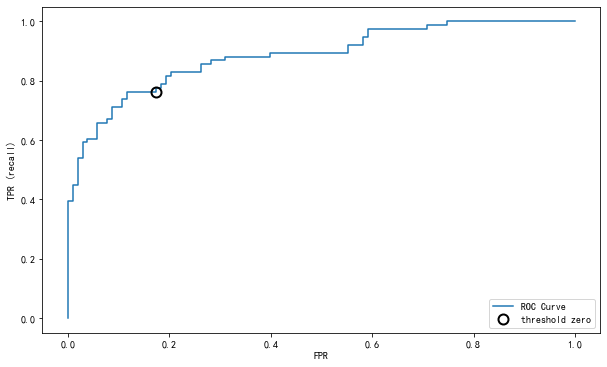

In [24]:
#写入代码

fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(x_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [25]:
# 根据参考答案来做的,还是需要系统化的一步步学习,这一块的知识点有很多,匆忙没什么效果

#### 思考6
* 对于多分类问题如何绘制ROC曲线

In [26]:
#思考回答

# 没搞懂,不明白


【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

In [27]:
#思考回答

# roc面积越大越好,从这曲线看出准确率还不够高,其它要等到系统学习后再了解